<a href="https://colab.research.google.com/github/LiveKlas/GenerativeAIExamples/blob/main/Implementation_of_Moondream2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Moondream2**

Let us now see the Python implementation of moondream2 using transformers.

**Prerequisites**

We need to install transformers, timm (PyTorch Image Models), and einops (Einstein Operations) first before utilizing the mode

In [ ]:
!pip install transformers timm einops

## **1.Image Captioning (Image Description)**

As the name suggests, it is the task of describing the content of an image in words. Let’s see with an example.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

model_id = "vikhyatk/moondream2"
revision = "2024-07-23"
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

image1 = Image.open('/content/girl_and_cats.jpg')

enc_image = model.encode_image(image1)
print(model.answer_question(enc_image, "Describe this image.", tokenizer))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


A young girl is seen affectionately holding two kittens in her arms, one gray and one orange, against a wooden background.


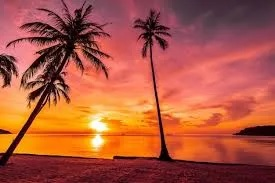

In [ ]:
image2 = Image.open('/content/beach_and_sunset.jpg')
image2

In [ ]:
enc_image = model.encode_image(image2)
output = model.answer_question(enc_image, "Write a beautiful poem about this image", tokenizer)

In [ ]:
print(output)

The image captures a serene tropical beach scene at sunset. Two palm trees stand tall on the left side, their silhouettes contrasting against the vibrant orange and pink sky. The sun is setting behind the trees, casting a warm glow over the calm ocean in the background. The sky is filled with clouds, adding depth and texture to the scene. The beach is covered in light brown sand, and the water is a darker shade of blue, reflecting the colors of the sky.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="huggingface_hub.file_download")

In [ ]:
from PIL import Image
image3 = Image.open('/content/busy_street.png')
image3



Input: Describe this image in detail
Response: The image depicts a busy street scene in London, UK. The street is lined with red double-decker buses, and pedestrians can be seen walking along the sidewalk. In the background, the iconic Big Ben clock tower stands tall, with its white clock face and black clock hands visible against the blue sky. The street is framed by buildings with black roofs, and trees line the street, providing a natural contrast to the urban setting.


In [ ]:
enc_image = model.encode_image(image3)
output = model.answer_question(enc_image, "Describe this image in detail", tokenizer)

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD+color.BLUE+"Input:"+color.END, "Describe this image in detail")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

So, the model generates a detailed description of the image by identifying the objects (such as clock tower, buildings, buses, people, etc.) and their activities.

### **personalized image-to-text descriptions**

**Using moondream2 personalized image-to-text descriptions** can also be generated as shown in the
below example.

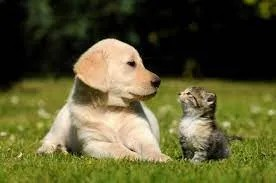

In [ ]:
image4 = Image.open('/content/cat_and_dog.png')
image4
#

In [ ]:
enc_image = model.encode_image(image4)
output = model.answer_question(enc_image, "Write a conversation between the two", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Write a conversation between the two")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Write a conversation between the two
Response: The puppy and the kitten are sitting on the grass, facing each other. The puppy appears to be looking at the kitten, and the kitten seems to be looking at the puppy. They seem to be curious about each other and are engaging in a friendly interaction.


## **2. Visual Question-Answering (Visual Conversation)**

**VQA (Visual Question Answering)**  is about answering open-ended questions about an image. We pass in the image and the question as input to the model.

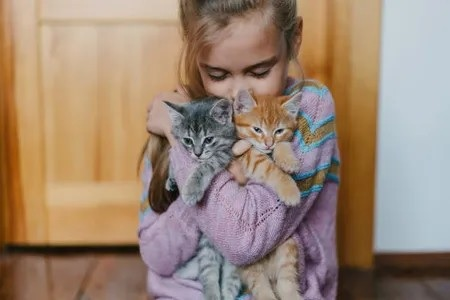

In [ ]:
image5 = Image.open('/content/girl_and_cats.jpg')
image5

In [ ]:
enc_image = model.encode_image(image5)
answer1 = model.answer_question(enc_image, "How many cats the girl is holding?", tokenizer)
answer2 = model.answer_question(enc_image, "what is their color?", tokenizer)

print(color.BOLD+color.BLUE+"Question 1:"+color.END, "How many cats the girl is holding?")
print(color.BOLD+color.BLUE+"Answer 1:"+color.END, answer1)
print(color.BOLD+color.BLUE+"Question 2:"+color.END, "what is their color?")
print(color.BOLD+color.BLUE+"Answer 2:"+color.END, answer2)

Question 1: How many cats the girl is holding?
Answer 1: The girl is holding two cats.
Question 2: what is their color?
Answer 2: The color of the kittens is gray and orange.


The model correctly answers the above two questions regarding the image.

## **3. Visual story-telling/poem-writing**


Telling a story or writing poems using images. For example:

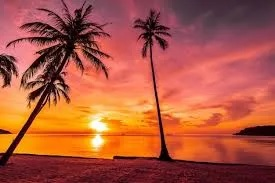

In [ ]:
image5 = Image.open('/content/beach_and_sunset.jpg')
image5

In [ ]:
enc_image = model.encode_image(image5)
output = model.answer_question(enc_image, "Write a beautiful poem about this image", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Write a beautiful story about this image")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Write a beautiful story about this image
Response: The image captures a serene tropical beach scene at sunset. Two palm trees stand tall on the left side, their silhouettes contrasting against the vibrant orange and pink sky. The sun is setting behind the trees, casting a warm glow over the calm ocean in the background. The sky is filled with clouds, adding depth and texture to the scene. The beach is covered in light brown sand, and the water is a darker shade of blue, reflecting the colors of the sky.


## **4. Visual Knowledge Reasoning**


Visual knowledge reasoning involves integrating external knowledge and facts, extending beyond the visible content, to address questions effectively.

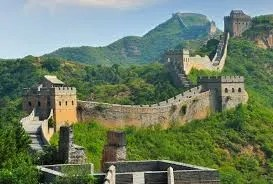

In [ ]:
image6 = Image.open('/content/Great_Wall_of_China.png')
image6

In [ ]:
enc_image = model.encode_image(image6)
output = model.answer_question(enc_image, "Tell about the history of this place", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "Tell about the history of this place")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: Tell about the history of this place
Response: The image depicts the Great Wall of China, a historic and iconic landmark that stretches across the country. The wall is built on a series of hills and mountains, showcasing the impressive engineering and architectural skills of the ancient Chinese. The wall is not only a symbol of the country's rich history but also a popular tourist attraction. Visitors can explore the wall from various vantage points, such as the top of the wall, the base, or the sides, to appreciate its grandeur and historical significance. The presence of the wall in the image highlights the cultural heritage and architectural prowess of the Chinese people, making it a must-visit destination for anyone interested in Chinese history and culture.


The model identifies the image as the Great Wall of China and tells its history.

## **5. Visual Commonsense Reasoning**

Answering the questions by leveraging common knowledge and contextual understanding of the visual world evoked by the image.

For example:

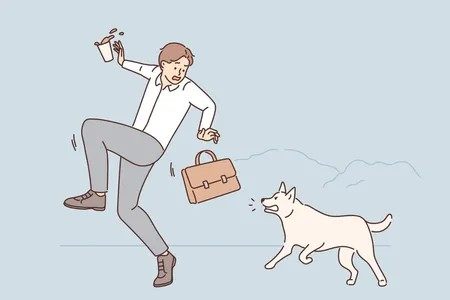

In [ ]:
image7 = Image.open('/content/man_and_dog.png')
image7

In [ ]:
enc_image = model.encode_image(image7)
output = model.answer_question(enc_image, "what does the man feel and why?", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "what does the man fell and why?")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: what does the man fell and why?
Response: The man in the image appears to be feeling angry or frustrated, as he is throwing a coffee cup and spilling its contents while running. This action suggests that he might be upset or annoyed about something, possibly related to his work or personal life. The spilled coffee could be a result of a mistake, an unexpected event, or an encounter with a person or situation that has caused him distress. The man's reaction to this situation indicates that he is experiencing strong emotions and is trying to express them through his actions.


## **6. Text Recognition**


Image text recognition refers to the process of automatically identifying and extracting text content from images, like OCR.

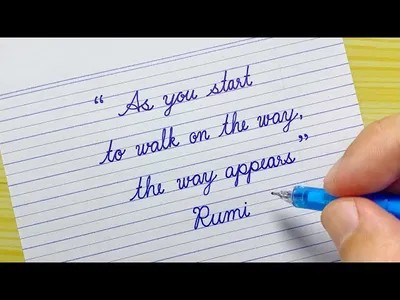

In [ ]:
image8 = Image.open('/content/written_quote.png')
image8

In [ ]:
enc_image = model.encode_image(image8)
output = model.answer_question(enc_image, "what's written on this piece of paper?", tokenizer)

print(color.BOLD+color.BLUE+"Input:"+color.END, "what's written on this piece of paper?")
print(color.BOLD+color.BLUE+"Response:"+color.END, output)

Input: what's written on this piece of paper?
Response: The handwritten quote on the paper says, "As you start to walk on the way, the way appears." - Rumi


## **Limitations of Moondream2**

Moondream2 is specifically designed to answer questions about images. It has the following
limitations.

* It may struggle with theoretical or abstract questions that demand multi-step reasoning, such as “Why would a cat do that?”. Because the images are sampled down to 378×378 and the model might find it challenging to address queries about very minute details within the image.
* It has limited ability to perform OCR on images containing textual content.
* It may struggle with accurately counting items beyond two or three.
* The model may produce offensive, inappropriate, or hurtful content if prompted to do so.

## **Conclusion**


We implemented Moondream2, a compact vision-language model tailored for resource-constrained devices. By dissecting its components and demonstrating its prowess through various image-to-text tasks, Moondream2 proves its utility in real-world applications. However, its limitations, such as difficulty with abstract queries and limited OCR capabilities, underscore the need for continual refinement. Nevertheless, Moondream2 heralds a promising avenue for efficient multi-modal understanding and generation, offering practical solutions across diverse domains.

## **Key Takeaways**


Moondream2 is a small, open-source vision-language model designed for devices with limited resources.
Python implementation of Moondream2 using transformers, enabling tasks like image captioning, visual question-answering, story-telling, and more.
Moondream2’s compact size makes it suitable for deployment in retail analytics, robotics, security, and other domains with limited resources.
Promising avenue for efficient multi-modal understanding and generation, offering practical solutions in various industries.